In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\Prathosh\Downloads\data.csv")

In [4]:
data.head()

,time_id,ping_ms,temperature_c,humidity_p
0,2021-09-30 21:08:02,17.28,25,35
1,2021-09-30 21:09:02,17.73,23,40
2,2021-09-30 21:10:01,18.59,22,41
3,2021-09-30 21:12:02,16.73,22,42
4,2021-09-30 21:13:02,18.12,22,42


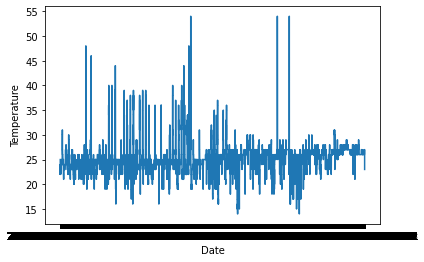

In [5]:
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.plot(data['time_id'],data['temperature_c'])

In [9]:
data = data.set_index(['time_id'])
data

,ping_ms,temperature_c,humidity_p
time_id,,,
2021-09-30 21:08:02,17.28,25,35
2021-09-30 21:09:02,17.73,23,40
2021-09-30 21:10:01,18.59,22,41
2021-09-30 21:12:02,16.73,22,42
2021-09-30 21:13:02,18.12,22,42
...,...,...,...
2022-01-10 13:12:02,2000.00,27,28
2022-01-10 13:13:02,2000.00,27,28
2022-01-10 13:14:01,2000.00,27,28


In [10]:
df=pd.DataFrame()
df['#temp']=data['temperature_c']
df

,#temp
time_id,
2021-09-30 21:08:02,25
2021-09-30 21:09:02,23
2021-09-30 21:10:01,22
2021-09-30 21:12:02,22
2021-09-30 21:13:02,22
...,...
2022-01-10 13:12:02,27
2022-01-10 13:13:02,27
2022-01-10 13:14:01,27


In [11]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
y=sc.fit_transform(df)
df['#temp']=y
df

,#temp
time_id,
2021-09-30 21:08:02,-0.105148
2021-09-30 21:09:02,-0.963220
2021-09-30 21:10:01,-1.392256
2021-09-30 21:12:02,-1.392256
2021-09-30 21:13:02,-1.392256
...,...
2022-01-10 13:12:02,0.752924
2022-01-10 13:13:02,0.752924
2022-01-10 13:14:01,0.752924


### ROLLING TEST

In [12]:
rol_mean = df.rolling(window=365*1440).mean()
rol_std = df.rolling(window=365*1440).std()

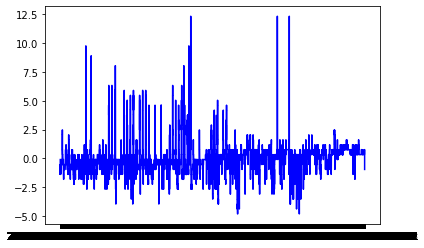

In [13]:
plt.plot(df, c='blue')
plt.plot(rol_mean, c='black')
plt.plot(rol_std, c='red')

### ADF TEST:

In [15]:
from statsmodels.tsa.stattools import adfuller
dftest= adfuller(df['#temp'])
print(dftest)

(-21.472963016422973, 0.0, 8, 130328, {'1%': -3.4304001766988117, '5%': -2.8615621773716287, '10%': -2.5667818042289707}, -114194.95725918675)


 ##### p value<0.05 so stationary

### SEASONAL DECOMPOSITION:

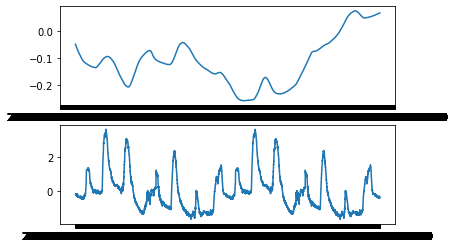

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df,model = 'additive',period=1440)

trend=decompose.trend
season =decompose.seasonal

plt.subplot(211)
plt.plot(trend)
plt.subplot(212)
plt.plot(season)

##### For arima we need p,d,g so that we can forecast with the original data 
##### We need to plot ACF and PACF

C:\Users\Shruthi Mohan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\Shruthi Mohan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
C:\Users\Shruthi Mohan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


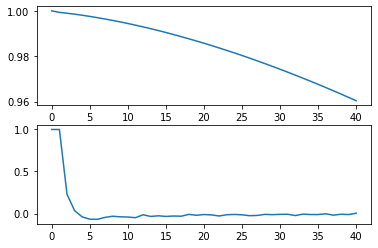

In [19]:
from statsmodels.tsa.stattools import acf,pacf

acf_plot = acf(df)
pacf_plot = pacf(df)

plt.subplot(211)
plt.plot(acf_plot)
plt.subplot(212)
plt.plot(pacf_plot)

### FORECASTING USING ARIMA MODEL 

##### WE USE P,D,G VALUES FOUND ABOVE
##### Now we ignore the new data and use the original data alone to forecast

In [109]:
model=ARIMA(ts_data,seasonal_order=(2,2,1,12))
model_fit=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [114]:
res=model_fit.forecast(24)

In [115]:
res = pd.DataFrame(res)
res.columns=['#temp']
data_pred = pd.DataFrame(data)
data_pred = data_pred.append(res)

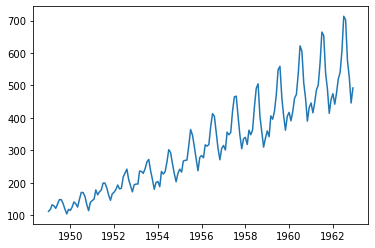

In [116]:
plt.plot(data_pred)